In [6]:
import string
import re
import pandas
import numpy
import nltk
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [7]:
#!pip install wordCloud

In [37]:
nltk.download('inaugural')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91759\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91759\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91759\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.corpus import inaugural

In [24]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [25]:
inaugural.raw('1941-Roosevelt.txt' )

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [13]:
dictionary={'Roosevelt':'1941-Roosevelt.txt',
          'Kennedy':'1961-Kennedy.txt',
          'Nixon':'1973-Nixon.txt'}

In [14]:
speech=[]
name=[]
for x in dictionary.keys():
    name.append(x)
    speech.append(inaugural.raw(dictionary[x]))

In [15]:
name

['Roosevelt', 'Kennedy', 'Nixon']

In [16]:
data=pandas.DataFrame({'Name':name,'speech':speech})
data

,Name,speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [17]:
sp_df=data.copy()

## Analysis

In [38]:
len(inaugural.sents())

5220

In [49]:
len(inaugural.words('1961-Kennedy.txt'))


1546

In [51]:
ken=inaugural.words('1961-Kennedy.txt')
kens=[word.lower() for word in ken]
len(kens)

1546

In [ ]:
len(sp_df.loc[0])

### Number of sentences

In [27]:
sp_df['sentences']=sp_df['speech'].apply(lambda x: len(re.split(r'[.!?]+', x )))
sp_df.head()

,Name,speech,sentences
0,Roosevelt,On each national day of inauguration since 178...,69
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",73


### Number of words

In [28]:
sp_df['words']=sp_df['speech'].apply(lambda x : len([x for x in x.split()]))
sp_df.head()

,Name,speech,sentences,words
0,Roosevelt,On each national day of inauguration since 178...,69,1360
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56,1390
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",73,1819


### Number of characters

In [167]:
sp_df['characters']=sp_df['speech'].apply(lambda x :sum([len(x) for x in x.split()]))
sp_df.head()

,Name,speech,sentences,words,characters
0,Roosevelt,On each national day of inauguration since 178...,69,1360,6174
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56,1390,6202
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",73,1819,8122


### Lower case

In [168]:
sp_df['speech']=sp_df['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
sp_df

,Name,speech,sentences,words,characters
0,Roosevelt,on each national day of inauguration since 178...,69,1360,6174
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",56,1390,6202
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",73,1819,8122


### Removal of punctuation:

In [169]:
sp_df['speech']=sp_df['speech'].str.replace('[^\w\s]','')
sp_df

,Name,speech,sentences,words,characters
0,Roosevelt,on each national day of inauguration since 178...,69,1360,6174
1,Kennedy,vice president johnson mr speaker mr chief jus...,56,1390,6202
2,Nixon,mr vice president mr speaker mr chief justice ...,73,1819,8122


### Removal of numbers

In [170]:
sp_df['speech']=sp_df['speech'].str.replace('[0-9]','')
sp_df.head()

,Name,speech,sentences,words,characters
0,Roosevelt,on each national day of inauguration since th...,69,1360,6174
1,Kennedy,vice president johnson mr speaker mr chief jus...,56,1390,6202
2,Nixon,mr vice president mr speaker mr chief justice ...,73,1819,8122


### Freq of words before processing

In [195]:
sp_df['speech'].apply(lambda x : nltk.FreqDist(x.split()).most_common(5)).values

array([list([('the', 114), ('of', 81), ('and', 46), ('to', 36), ('in', 35)]),
       list([('the', 86), ('of', 65), ('to', 42), ('and', 41), ('we', 30)]),
       list([('the', 83), ('of', 68), ('to', 65), ('in', 58), ('and', 50)])],
      dtype=object)

### Lemmetization

In [211]:
lemm=WordNetLemmatizer()
sp_df['speech']=sp_df['speech'].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in x.split()]))


### Removing stop words

In [246]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['mr','ms','mrs','u','ha','wa','let','nation','america','world','know'])

In [247]:
sp_df['clean_words']=sp_df['speech'].apply(lambda x : [word for word in x.split() if word not in stopwords])
sp_df

,Name,speech,sentences,words,characters,clean_words
0,Roosevelt,on each national day of inauguration since the...,69,1360,6174,"[national, day, inauguration, since, people, r..."
1,Kennedy,vice president johnson mr speaker mr chief jus...,56,1390,6202,"[vice, president, johnson, speaker, chief, jus..."
2,Nixon,mr vice president mr speaker mr chief justice ...,73,1819,8122,"[vice, president, speaker, chief, justice, sen..."


In [248]:
sp_df['clean_words'].apply(lambda x : nltk.FreqDist(x).most_common(5)).values

array([list([('life', 11), ('people', 9), ('spirit', 9), ('democracy', 9), ('year', 7)]),
       list([('side', 8), ('power', 7), ('new', 7), ('pledge', 7), ('citizen', 5)]),
       list([('peace', 19), ('responsibility', 16), ('new', 15), ('government', 10), ('great', 9)])],
      dtype=object)

### Number of words after pre-processing:

In [277]:
sp_df['words_af_cleaned']=sp_df['clean_words'].apply(lambda x : len([word for word in x]))
sp_df.head()

,Name,speech,sentences,words,characters,clean_words,words_af_cleaned
0,Roosevelt,on each national day of inauguration since the...,69,1360,6174,"[national, day, inauguration, since, people, r...",579
1,Kennedy,vice president johnson mr speaker mr chief jus...,56,1390,6202,"[vice, president, johnson, speaker, chief, jus...",640
2,Nixon,mr vice president mr speaker mr chief justice ...,73,1819,8122,"[vice, president, speaker, chief, justice, sen...",726


### Number of characters after cleaning

In [278]:
sp_df['characters_af_cleaned']=sp_df['clean_words'].apply(lambda x :sum([len(word) for word in x]))
sp_df.head()

,Name,speech,sentences,words,characters,clean_words,words_af_cleaned,characters_af_cleaned
0,Roosevelt,on each national day of inauguration since the...,69,1360,6174,"[national, day, inauguration, since, people, r...",579,3655
1,Kennedy,vice president johnson mr speaker mr chief jus...,56,1390,6202,"[vice, president, johnson, speaker, chief, jus...",640,3787
2,Nixon,mr vice president mr speaker mr chief justice ...,73,1819,8122,"[vice, president, speaker, chief, justice, sen...",726,4545


### WordCloud

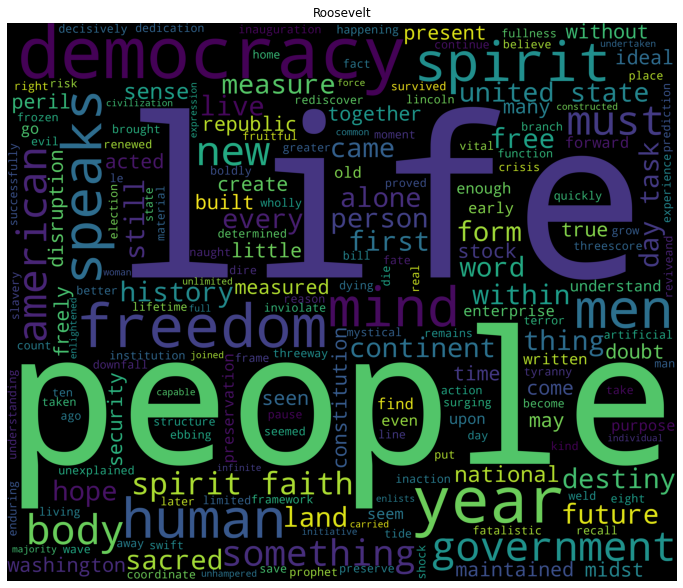

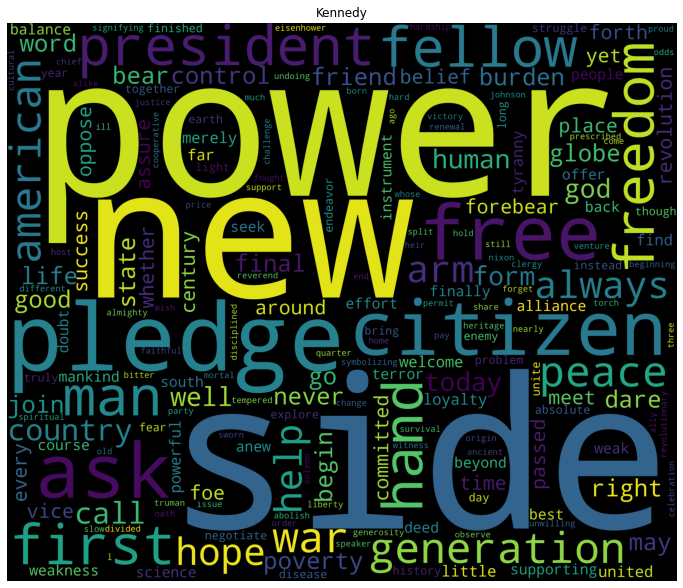

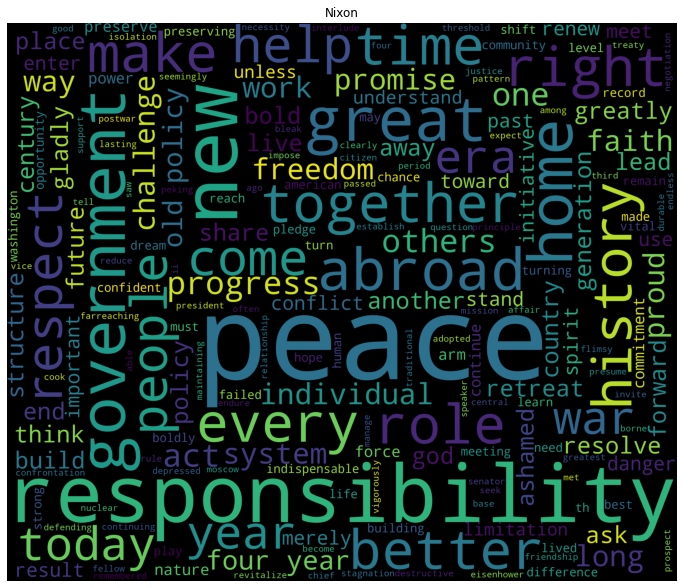

In [273]:
for idx in numpy.arange(sp_df.shape[0]):

    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(' '.join(sp_df.iloc[idx]['clean_words']))
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(sp_df.iloc[idx]['Name'])
    plt.show()
